In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
csv = pd.read_csv(".\\df_final.csv")
csv.head()

,Location,Region,EU Member,Schengen Agreement,Google Domain Type,Google Domain Used,Job Title,Company Name,Job Location,Apply Options,...,languages_and_runtimes,monitoring_analytics_and_crash_reporting,native_interop,networking_and_api,security_and_cryptography,testing_frameworks,ui_cross_platform,ui_guidelines,ui_native,version_control_and_branching
0,Austria,Europe,True,True,default,google.com,"Android Developer – Kotlin (Austria based, Hyb...",Bitcoin Devs Company,"Vienna, Austria",Jobs3,...,Kotlin,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,Europe,True,True,default,google.com,ios entwickler 80–100% w/m/d,CHANCENLAND VORARLBERG,"Dornbirn, Austria","IT-Career.at, STEMJOBS.AT, IT-JOBS.AT",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,Europe,True,True,default,google.com,Middle iOS developer,Processica,"Vienna, Austria",JOBITT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,Europe,True,True,default,google.com,iOS Developer,Raiffeisen Gruppe,"Linz, Austria","Jooble, Trabajo.org - Stellenangebote, Arbeit",...,Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,Europe,True,True,default,google.com,iOS Software Engineer,Cybermoth,"Vienna, Austria","Expertini, Talent.com",...,"Java, Kotlin, Objective-C, Swift",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(csv):
    # Drop columns: 'Technologies Only', 'Technologies Categorized' and 8 other columns
    csv = csv.drop(columns=['Technologies Only', 'Technologies Categorized', 'Extracted Technologies Clean', 'Extracted Technologies GPT', 'Full Requirements', 'Benefits', 'Responsibilities', 'Nice to have', 'Requirements', 'Salary_E'])
    return csv

df = clean_data(csv.copy())

In [37]:
df_patterns = df[df['Platform'] == "iOS"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns.columns = ['architectural_patterns', 'count']

# Graphs

In [51]:
df_patterns_eu = df[(df['Platform'] == "iOS") & (df['Region'] == "Europe")]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns_eu.columns = ['architectural_patterns', 'count']
df_patterns_eu

,architectural_patterns,count
0,MVVM,165
1,MVC,70
2,VIPER,47
3,MVP,38
4,Clean Architecture,29
5,VIP,5
6,Redux,3
7,MVI,2


In [52]:
df_patterns_na = df[(df['Platform'] == "iOS") & (df['Region'] == "Northern America")]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns_na.columns = ['architectural_patterns', 'count']
df_patterns_na

,architectural_patterns,count
0,MVVM,64
1,MVC,43
2,VIPER,19
3,MVP,16
4,Clean Architecture,10
5,Redux,2
6,MVI,1


# Huinya

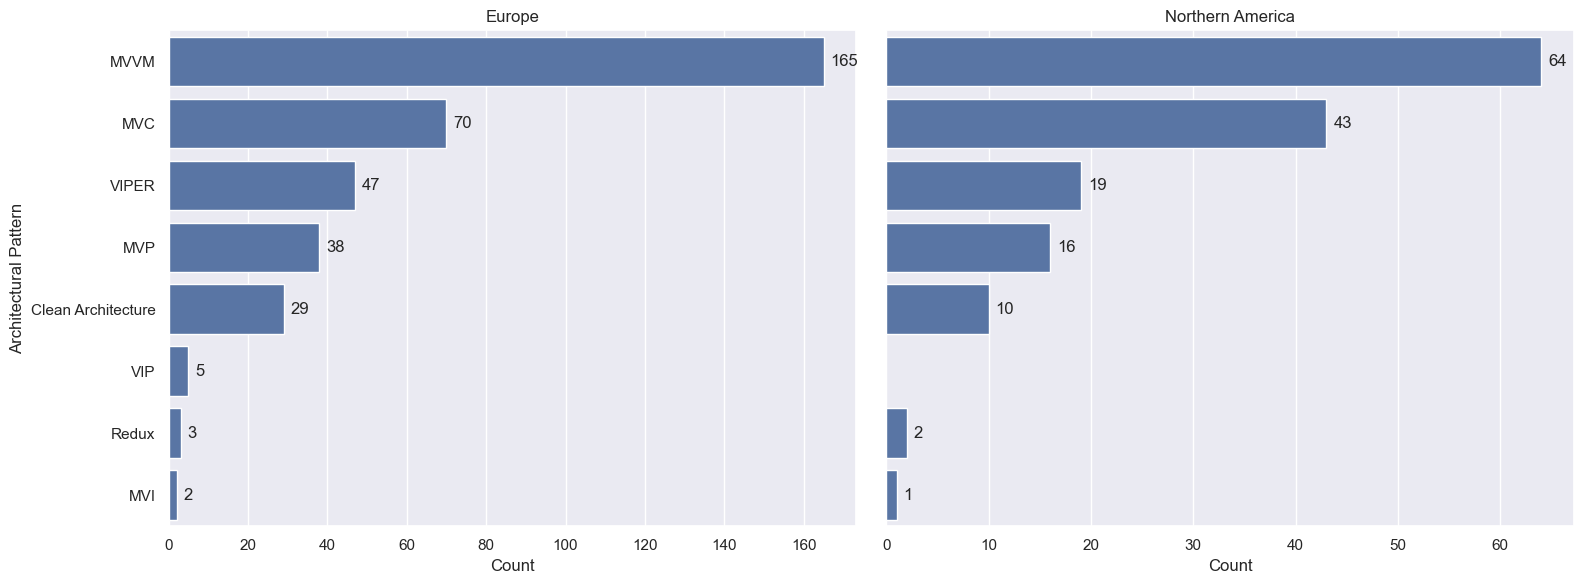

In [55]:
# создаём фигуру с 2 подграфиками (subplots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # sharey=True чтобы ось Y была общей

# Левый график - Европа
sns.barplot(
    data=df_patterns_eu,
    x='count',
    y='architectural_patterns',
    ax=axes[0],
    orient='h'
)
axes[0].set_title('Europe')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Architectural Pattern')

# подписываем бары
for container in axes[0].containers:
    axes[0].bar_label(container, padding=5)

# Правый график - Северная Америка
sns.barplot(
    data=df_patterns_na,
    x='count',
    y='architectural_patterns',
    ax=axes[1],
    orient='h'
)
axes[1].set_title('Northern America')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')  # убираем дублирование подписи оси Y

# подписываем бары
for container in axes[1].containers:
    axes[1].bar_label(container, padding=5)

plt.tight_layout()
plt.show()

## Example

In [53]:
df_patterns = df[df['Platform'] == "iOS"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns.columns = ['architectural_patterns', 'count']

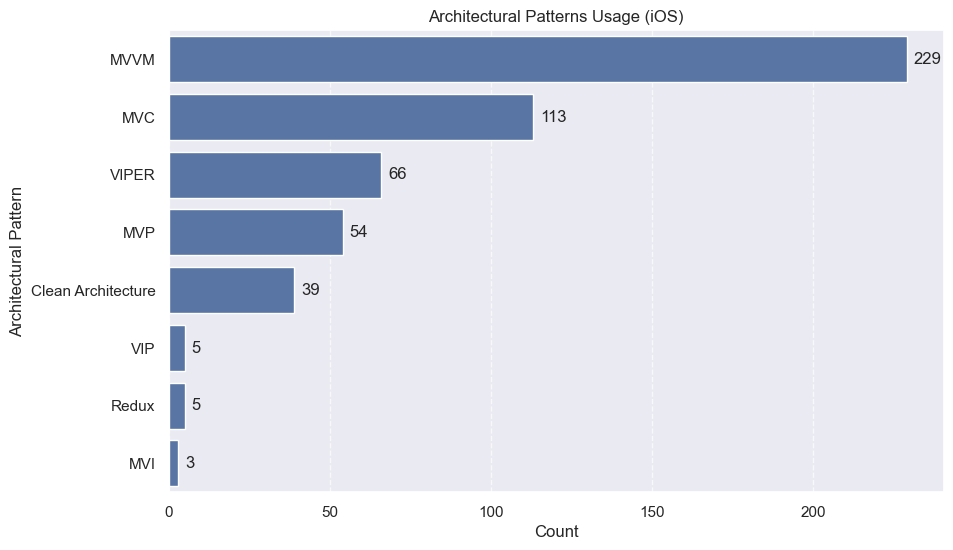

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_patterns,
    x='count',
    y='architectural_patterns',
    orient='h'
)

for i in ax.containers:
    ax.bar_label(i, padding=5)

plt.title('Architectural Patterns Usage (iOS)')
plt.xlabel('Count')
plt.ylabel('Architectural Pattern')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [28]:
df[df['Platform'] == "Android"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()

,architectural_patterns,count
0,MVVM,233
1,MVP,97
2,Clean Architecture,78
3,MVC,45
4,MVI,41
5,VIPER,7
6,Redux,3
